In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
books = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Books.csv", on_bad_lines = 'skip')
rating = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Ratings.csv")

# Dataset Overview

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# By using the ISBN, which is the unique code used for books, the two data sets we added before, named books and ratings, are combined.

df = rating.merge(books, how="left", on="ISBN")
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1149780 non-null  int64 
 1   ISBN                 1149780 non-null  object
 2   Book-Rating          1149780 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 96.5+ MB


In [7]:
df.shape

(1149780, 10)

In [8]:
df["Book-Title"].nunique()

241071

In [9]:
# Number of rates for each book
rating_counts = pd.DataFrame(df["Book-Title"].value_counts())
rating_counts.head(10)

,Book-Title
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
Bridget Jones's Diary,815
The Secret Life of Bees,774
Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
The Red Tent (Bestselling Backlist),723
Angels &amp; Demons,670


In [76]:
# Let's remove the books with a rate less than 100 from the data set.

rare_books = rating_counts[rating_counts["Book-Title"] < 100].index
common_books = df[~df["Book-Title"].isin(rare_books)]
common_books.shape

(302443, 10)

In [77]:
common_books["Book-Title"].nunique()

914

We now have 914 books with over 100 rates.

In [78]:
user_books_df = common_books.pivot_table(index=["User-ID"], columns=["Book-Title"], values="Book-Rating")
user_books_df.shape

(38132, 914)

Rows have users, columns have books.

In [79]:
user_books_df.columns

Index(['1984', '1st to Die: A Novel', '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road', 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash', 'A Bend in the Road', 'A Case of Need', 'A Child Called \It\": One Child's Courage to Survive"',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)', 'Women Who Run with the Wolves', 'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players', 'Wuthering Heights', 'Year of Wonders', 'You Belong To Me', 'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values', 'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=914)

# User Based Recommendation

## Selecting a Random User and Determining the Movies They Watched

In [80]:
#random_user = int(pd.Series(user_books_df.index).sample(1).values)

In [81]:
random_user = 99252  

In [82]:
random_user_df = user_books_df[user_books_df.index == random_user]

In [83]:
books_read = random_user_df.columns[random_user_df.notna().any()].tolist()
books_read

['Anne of Green Gables (Anne of Green Gables Novels (Paperback))',
 'Message in a Bottle',
 'The Summons',
 'To Kill a Mockingbird',
 'Whispers']

We have accessed the books that the randomly selected user has read.

## Accessing the Data and IDs of Other Users Who Read the Same Books

In [84]:
# Let's create a new dataframe consisting of the books that the selected user has read.

books_read_df = user_books_df[books_read]

In [85]:
# Create a new dataframe named user_book_count that contains information about how many of the selected user's read books were read by each user.

user_book_count = books_read_df.T.notnull().sum()
user_book_count = user_book_count.reset_index()
user_book_count.columns = ["User-ID", "Book-Count"]
user_book_count

,User-ID,Book-Count
0,8,0
1,9,0
2,14,0
3,16,0
4,17,0
...,...,...
38127,278836,0
38128,278843,0
38129,278844,0
38130,278846,0


In [86]:
# Let's find users who use at least 60% of the books our users read.

perc = len(books_read) * 60 / 100
users_same_books = user_book_count[user_book_count["Book-Count"] >= perc]["User-ID"]
users_same_books

922        7346
1067       8362
1438      11676
2091      16795
2651      21014
          ...  
32541    238120
35786    260897
35971    262399
36782    268330
37547    274308
Name: User-ID, Length: 65, dtype: int64

## Determining the Users Most Similar to the User to be Recommended

In [87]:
# Let's gather the data of other users who are similar to the selected user.

final_df = pd.concat([books_read_df[books_read_df.index.isin(users_same_books)], random_user_df[books_read]])

In [88]:
# Create a new dataframe named corr_df which will contain the correlations between users.

corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ["user_id_1", "user_id_2"]
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,102647,7346,-1.000000
1,99252,43842,-0.997509
2,16795,112001,-0.997406
3,201017,99252,-0.994135
4,11676,112001,-0.989743
...,...,...,...
113,11676,59172,0.985136
114,55548,187145,1.000000
115,236283,30972,1.000000
116,260897,231210,1.000000


In [89]:
# Filter users with high correlation (above 0.50) with the selected user and create a new dataframe named top_users.

top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] > 0.50)][["user_id_2", "corr"]].reset_index(drop=True)
top_users

,user_id_2,corr
0,11676,0.534861
1,231210,0.755929
2,159033,0.755929
3,187145,0.755929
4,105979,0.967868


In [90]:
top_users = top_users.sort_values(by="corr", ascending=False)
top_users.rename(columns={"user_id_2": "User-ID"}, inplace=True)
top_users

,User-ID,corr
4,105979,0.967868
3,187145,0.755929
2,159033,0.755929
1,231210,0.755929
0,11676,0.534861


In [91]:
# Let's combine the rates given by these similar users with rating.csv and observe.

rating = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Ratings.csv")
final = top_users.merge(rating[["User-ID", "ISBN", "Book-Rating"]], how="inner")
top_users_ratings = final[final["User-ID"] != random_user]

## Calculating the Weighted Average Recommendation Score and Recommending a Book

In [92]:
top_users_ratings["weighted_rating"] = top_users_ratings["corr"] * top_users_ratings["Book-Rating"]

# In this way, we have corrected the rating values according to the correlation.

In [93]:
recommendation_df = top_users_ratings.groupby("ISBN").agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,ISBN,weighted_rating
0,9022906116,3.744025
1,0 7336 1053 6,0.000000
2,0000000000,4.813746
3,00000000000,4.278886
4,0001055666,4.813746


In [94]:
books_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.7].sort_values("weighted_rating", ascending=False)

In [95]:
book = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Books.csv")
recommend = books_to_be_recommend.merge(book[["ISBN", "Book-Title"]])
recommend = list(recommend["Book-Title"].loc[0:5])

In [96]:
recommend

['The Illustrated Man',
 'This Is the Story of Archibald Frisby: Who Was As Crazy for Science As Any Kid Could Be (Reading Rainbow Book)',
 'Tearing the Silence : On Being German in America',
 'Something to Declare',
 'Fail Safe',
 'In the Time of the Butterflies']

We recommended 6 movies to our randomly selected user using the user-based recommendation system.

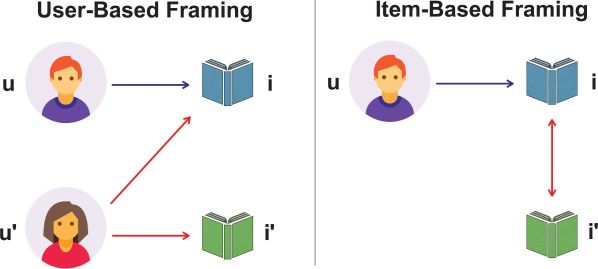

# Item Based Recommendation

### Loading the Dataset

In [36]:
books = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Books.csv", on_bad_lines = 'skip')
rating = pd.read_csv(r"C:\Users\24Shreyaskumar\Documents\Bit Manupilators - Coriolis Hackathon\ReadEZ\dataset\Ratings.csv")

### Get the ISBN of the book with the most recent rating from the user's book that received a rating of 9.

In [53]:
random_user = 99

In [54]:
book_id = rating[(rating["User-ID"] == random_user) & (rating["Book-Rating"] == 9)].iloc[0][1]
book_id

'0553347594'

In [55]:
book[book["ISBN"] == book_id]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
103,0553347594,McDonald's: Behind the Arches,John F. Love,1995,Bantam,http://images.amazon.com/images/P/0553347594.0...,http://images.amazon.com/images/P/0553347594.0...,http://images.amazon.com/images/P/0553347594.0...


In [97]:
book_name = "McDonald's: Behind the Arches"
book_name = user_books_df[book_name]

KeyError: "McDonald's: Behind the Arches"

In [98]:
recommend_book = user_books_df.corrwith(book_name).sort_values(ascending=False)

AttributeError: 'str' object has no attribute '_get_numeric_data'

In [100]:
recommend = recommend_book.reset_index()
recommend.columns = ["book_name", "corr"]
recommend = list(recommend.loc[1:5, "book_name"])
recommend

['The Heart of a Woman',
 "Galileo's Daughter: A Historical Memoir of Science, Faith, and Love",
 "It's Not About the Bike: My Journey Back to Life",
 'Whispers',
 'A Civil Action']